In [1]:
import os
import sys
import anndata
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
adata = sc.read_h5ad('Visium_IRI_R.h5ad')

In [3]:
import decoupler as dc

/home/qiao/anaconda3/envs/scvi-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
net = dc.get_collectri(organism='mouse', split_complexes=False)
net

28.2MB [00:00, 35.5MB/s]


,source,target,weight,PMID
0,Myc,Tert,1,10022128;10491298;10606235;10637317;10723141;1...
1,Spi1,Bglap,1,10022617
2,Spi1,Bglap3,1,10022617
3,Spi1,Bglap2,1,10022617
4,Smad3,Jun,1,10022869;12374795
...,...,...,...,...
38660,Runx1,Lcp2,1,20019798
38661,Runx1,Prr5l,1,20019798
38662,Twist1,Gli1,1,11948912
38663,Usf1,Nup188,1,22951020


In [25]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

84 features of mat are empty, they will be removed.
Running ulm on mat with 9209 samples and 19381 targets for 701 sources.


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.22s/it]


In [7]:
adata.obsm['ulm_estimate']

,Abl1,Aebp1,Ahr,Ahrr,Aip,Aire,Apex1,Ar,Arid1a,Arid3a,...,Znf148,Znf24,Znf263,Znf335,Znf354c,Znf382,Znf436,Znf76,Znf804a,Zxdc
Day14R_0,0.081328,0.899863,7.623662,-0.116760,0.113887,-0.516993,1.018325,5.114109,0.119545,-0.350369,...,0.263632,0.364903,-0.058528,0.412526,0.467919,-0.384782,0.214795,0.520852,-0.340324,-0.029972
Day14R_1,0.781247,5.276763,5.564509,-0.143352,-0.527166,-0.686828,1.804233,6.563983,-0.228662,0.343626,...,3.005187,1.362129,-0.444259,-0.536202,0.591619,-1.179099,0.036846,1.023130,-0.286723,0.343621
Day14R_10,-0.115553,2.762161,8.930498,-0.201369,-0.065577,-0.364941,0.659848,5.358657,-0.070728,-0.025053,...,0.473679,1.316971,0.329304,0.754887,0.585692,-0.796982,0.151673,0.524025,-0.402776,0.192151
Day14R_100,0.253370,2.352615,9.403927,-0.225113,0.075626,-0.497131,1.540140,5.816805,0.092632,-0.138102,...,0.642095,1.200955,0.030814,0.887298,-0.083130,-0.598778,0.265426,0.906662,-0.248773,-0.070926
Day14R_1000,-0.110962,0.641380,3.005963,-0.788055,0.235456,-0.525766,0.035313,4.780471,0.216113,-0.296538,...,0.035081,0.773938,-0.323483,0.009126,-0.467890,-0.508420,-0.114392,0.627806,-0.175424,-0.029673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week6R_995,-0.111759,0.467097,1.621012,-0.121070,0.138399,-0.526350,-0.031410,4.867979,0.059274,-0.308018,...,-0.098033,0.720775,-0.075452,0.068233,-0.358030,0.219266,-0.290013,0.539137,-0.242162,-0.308018
Week6R_996,-0.211798,-0.113252,2.216165,-0.155992,-0.172908,-0.373380,0.233783,4.416038,0.364598,-0.076172,...,0.246294,2.919617,-0.179861,0.461934,-0.033066,-0.066708,0.220070,0.343763,-0.181389,-0.337453
Week6R_997,0.025475,0.839701,2.657548,0.022583,0.156614,-0.574196,0.362570,4.539721,-0.184352,-0.235456,...,-0.017347,1.036291,-0.125738,0.143364,-0.466026,-0.103636,0.049800,0.261425,-0.258004,-0.184920
Week6R_998,-0.052821,0.835642,2.019734,-0.064045,0.000701,-0.036186,-0.053656,3.043804,-0.001478,-0.255817,...,0.060580,0.626968,0.047966,0.293154,-0.339041,0.105488,-0.119198,0.139143,-0.191724,-0.255817


In [8]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

AnnData object with n_obs × n_vars = 9209 × 701
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'X_coords', 'Y_coords', 'ident', 'res2', 'x_centroid', 'y_centroid', 'celltype_raw', 'x_align', 'y_align', 'assigned_cn_label', 'CN_rename'
    uns: 'CN_DE_genes', 'CN_rename_colors', 'celltype_raw_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'res2_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial', 'ulm_estimate', 'ulm_pvals'

In [424]:
df = dc.rank_sources_groups(acts, groupby='CN_rename', reference='rest', method='wilcoxon')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,CN0: Loop of Henle,rest,Hnf1b,54.804309,6.498071,0.000000e+00,0.000000e+00
1,CN0: Loop of Henle,rest,Zkscan7,50.613003,0.714691,0.000000e+00,0.000000e+00
2,CN0: Loop of Henle,rest,Foxm1,47.430119,1.488999,0.000000e+00,0.000000e+00
3,CN0: Loop of Henle,rest,Cebpe,46.527002,1.301688,0.000000e+00,0.000000e+00
4,CN0: Loop of Henle,rest,Zfx,46.034695,1.788729,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
6304,CN8: Uro-immune Niche,rest,Pparg,-18.045674,-3.859423,8.531767e-73,7.667652e-72
6305,CN8: Uro-immune Niche,rest,Sirt1,-18.266280,-1.048305,1.535679e-74,1.474672e-73
6306,CN8: Uro-immune Niche,rest,Zfp202,-18.660592,-1.907424,1.035783e-77,1.100127e-76
6307,CN8: Uro-immune Niche,rest,Sp6,-21.046000,-0.625232,2.488119e-98,5.450536e-97


In [431]:
df = df[(df['pvals_adj']<0.05)&(df['meanchange']>0)]

In [433]:
df[(df.group=='CN7: Fibro-inflammatory Niche')].head(50)

,group,reference,names,statistic,meanchange,pvals,pvals_adj
4907,CN7: Fibro-inflammatory Niche,rest,Nfyb,29.876290,3.085760,4.000246e-196,2.804173e-193
4908,CN7: Fibro-inflammatory Niche,rest,Tbx21,27.770190,2.030443,9.941139e-170,3.484369e-167
4909,CN7: Fibro-inflammatory Niche,rest,Rfxap,27.390957,1.914286,3.514708e-165,8.212700e-163
4910,CN7: Fibro-inflammatory Niche,rest,Noto,27.242847,4.315222,2.019989e-163,3.540031e-161
4911,CN7: Fibro-inflammatory Niche,rest,Thra,27.188455,1.012513,8.894067e-163,1.246948e-160
4912,CN7: Fibro-inflammatory Niche,rest,Hivep2,26.958536,0.727462,4.530388e-160,5.293003e-158
4913,CN7: Fibro-inflammatory Niche,rest,Tox3,26.727159,2.361373,2.276155e-157,2.279407e-155
4914,CN7: Fibro-inflammatory Niche,rest,Rfxank,26.404647,1.661042,1.211739e-153,1.061786e-151
4915,CN7: Fibro-inflammatory Niche,rest,Nfkb2,26.282068,0.977709,3.074845e-152,2.394963e-150
4916,CN7: Fibro-inflammatory Niche,rest,Zic2,26.172937,1.061132,5.403641e-151,3.787952e-149


In [494]:
#sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, groupby='CN_rename', reference='rest', method='t-test_overestim_var', use_raw=False, pts=True)

In [500]:
dedf = sc.get.rank_genes_groups_df(adata, group=None)
dedf = dedf[(dedf['pvals_adj']<0.001)&(dedf['logfoldchanges']>0.5)]

In [501]:
dedf = dedf[dedf['pct_nz_group']>0.4]

In [502]:
filtered_tf = {}

for CN in adata.obs['CN_rename'].unique():
    tmp = df[(df['group']==CN) & (df['names'].isin(dedf[dedf['group']==CN].names))]
    filtered_tf[CN] = tmp

In [503]:
pd.concat(filtered_tf.values(), axis=0, ignore_index=True).to_csv("GRN_Supple_data5.csv")

In [504]:
pd.concat(filtered_tf.values(), axis=0, ignore_index=True)

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,CN7: Fibro-inflammatory Niche,rest,Thra,27.188455,1.012513,8.894067e-163,1.246948e-160
1,CN7: Fibro-inflammatory Niche,rest,Hivep2,26.958536,0.727462,4.530388e-160,5.293003e-158
2,CN7: Fibro-inflammatory Niche,rest,Tox3,26.727159,2.361373,2.276155e-157,2.279407e-155
3,CN7: Fibro-inflammatory Niche,rest,Rfxank,26.404647,1.661042,1.211739e-153,1.061786e-151
4,CN7: Fibro-inflammatory Niche,rest,Nfkb2,26.282068,0.977709,3.074845e-152,2.394963e-150
...,...,...,...,...,...,...,...
290,CN4: Injured Proximal Tubule,rest,Cebpb,4.863603,0.058320,1.152683e-06,1.474508e-06
291,CN4: Injured Proximal Tubule,rest,Ybx3,4.809382,0.040544,1.513973e-06,1.922636e-06
292,CN4: Injured Proximal Tubule,rest,Rela,4.674881,0.008747,2.941244e-06,3.681807e-06
293,CN4: Injured Proximal Tubule,rest,Phf5a,3.227878,0.002915,1.247123e-03,1.471773e-03


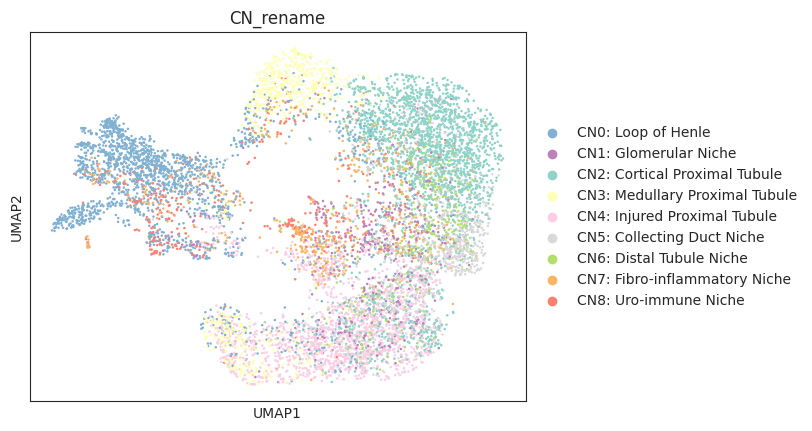

In [121]:
sc.pl.umap(adata, color='CN_rename', cmap="Reds")

In [158]:
source_markers = ['Hivep2','Nfat5','Nfatc2','Spi1','Nfkb1', 'Irf1','Irf5','Irf8',
                  'Runx1','Runx2','Ets1','Stat2']

In [404]:
fc.T.sort_values("CN7", ascending=False)

,CN7
names,
Spi1,1.854313
Irf1,1.708173
Runx2,1.538500
Stat2,1.528475
Nfatc2,1.514480
Nfkb1,1.425900
Runx1,1.392056
Irf8,1.329484
Ets1,1.225336


In [425]:
df[(df.group=='CN7: Fibro-inflammatory Niche')&(df.names.isin(source_markers))]

,group,reference,names,statistic,meanchange,pvals,pvals_adj
4912,CN7: Fibro-inflammatory Niche,rest,Hivep2,26.958536,0.727462,4.530388e-160,5.293003e-158
4952,CN7: Fibro-inflammatory Niche,rest,Irf1,21.538086,1.259623,6.847867e-103,9.600710e-102
4990,CN7: Fibro-inflammatory Niche,rest,Spi1,18.092093,0.571436,3.678484e-73,2.503512e-72
5018,CN7: Fibro-inflammatory Niche,rest,Nfkb1,15.936890,0.853760,3.514105e-57,1.631382e-56
5038,CN7: Fibro-inflammatory Niche,rest,Irf8,14.588442,0.251160,3.327098e-48,1.247217e-47
5051,CN7: Fibro-inflammatory Niche,rest,Nfat5,14.108957,0.664260,3.344907e-45,1.132744e-44
5062,CN7: Fibro-inflammatory Niche,rest,Runx1,13.611949,1.320608,3.400549e-42,1.045520e-41
5063,CN7: Fibro-inflammatory Niche,rest,Irf5,13.596392,3.144588,4.206785e-42,1.282155e-41
5079,CN7: Fibro-inflammatory Niche,rest,Ets1,12.777793,1.538318,2.181736e-37,5.882297e-37
5081,CN7: Fibro-inflammatory Niche,rest,Runx2,12.718977,1.508732,4.638936e-37,1.236462e-36


In [427]:
2.315928e-30 < 1e-25

True

In [402]:
source_markers = fc.T.sort_values("CN7", ascending=False).index.to_list()

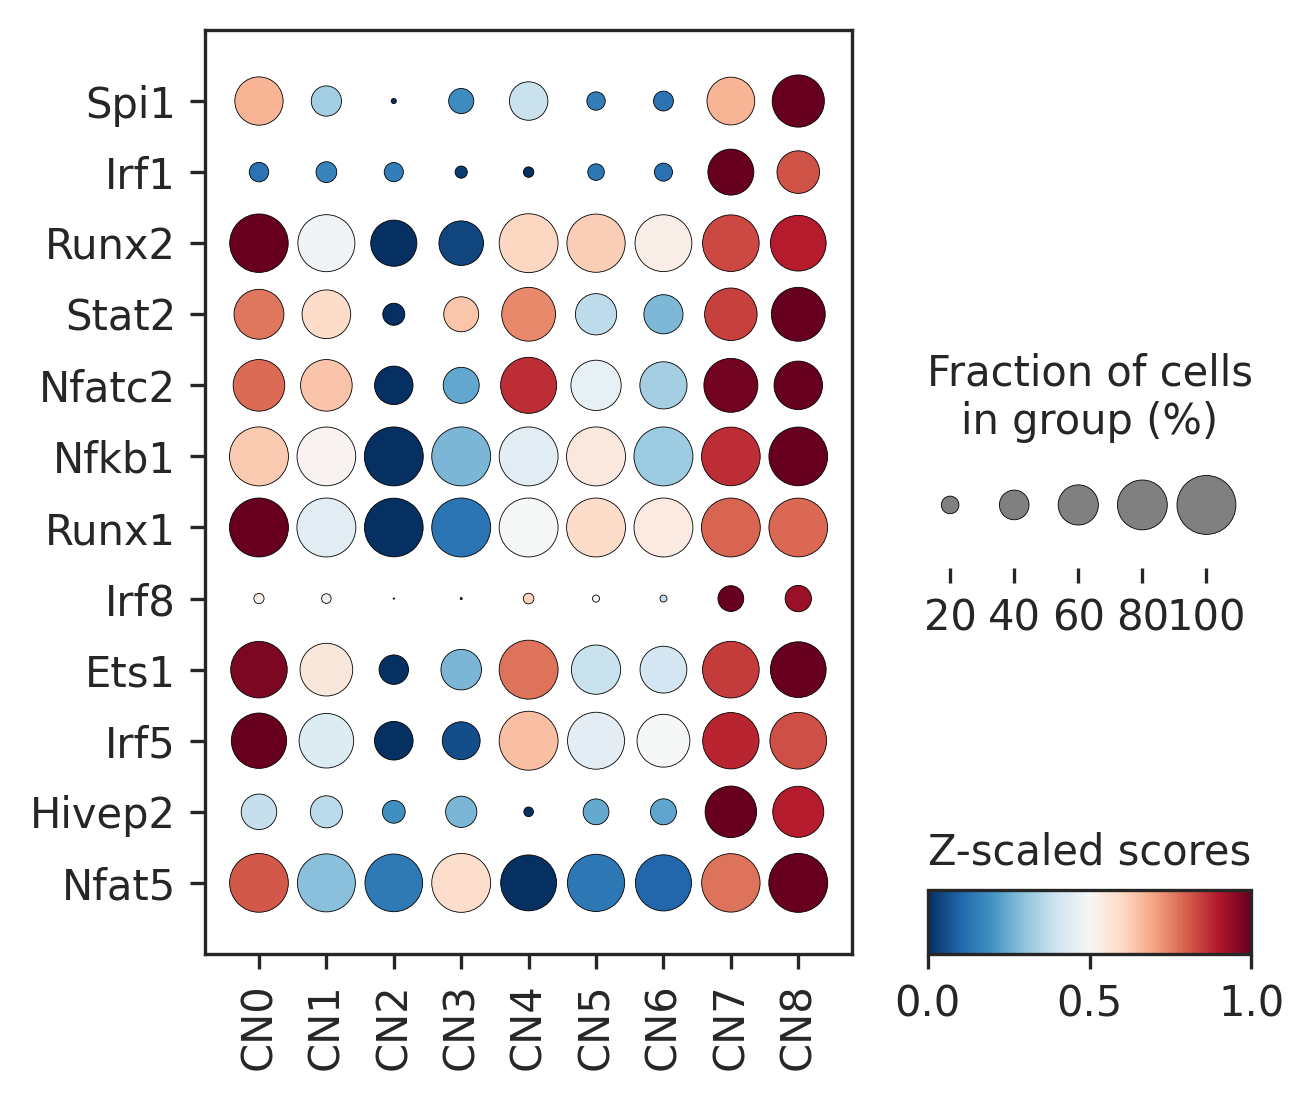

In [421]:
plt.rcParams.update({
    'font.size': 12,           # Adjust font size (e.g., 12, 14, 16)
    'axes.labelsize': 14,      # Increase axes labels
    'axes.titlesize': 14,      # Increase axes titles
    'xtick.labelsize': 12,     # Increase x-axis tick labels
    'ytick.labelsize': 12      # Increase y-axis tick labels
})

with plt.rc_context({"figure.dpi": (300)}):
    dp = sc.pl.dotplot(acts, source_markers, 'assigned_cn_label', cmap = 'RdBu_r', figsize=(4.5,4), show=False,
                   standard_scale='var', dendrogram=False, return_fig=True, swap_axes=True)
    dp.legend(colorbar_title='Z-scaled scores')

    dp.savefig("Visium_CN7_TF.pdf", transparent=True, bbox_inches="tight", dpi=300)
    plt.show()

{'mainplot_ax': <Axes: >,
 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <Axes: title={'center': 'Z-scaled scores'}>}

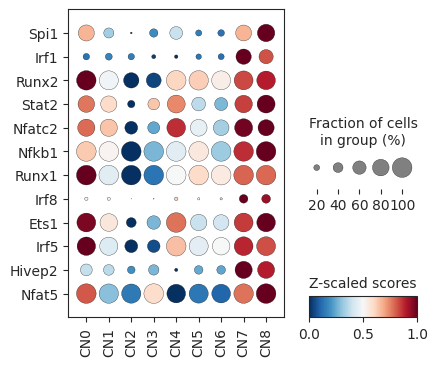

In [416]:
dp.get_axes()

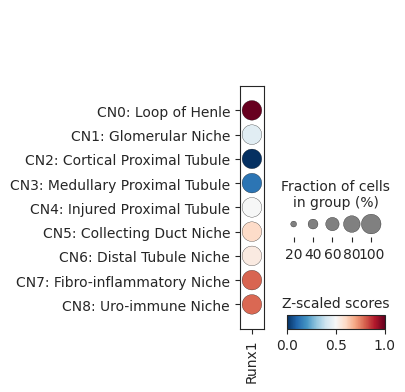

In [419]:
sc.pl.dotplot(acts, 'Runx1', 'CN_rename', dendrogram=False, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

In [170]:
dedf[(dedf['group']=='CN7: Fibro-inflammatory Niche') & (dedf['logfoldchanges']>1)]

,group,names,scores,logfoldchanges,pvals,pvals_adj
136255,CN7: Fibro-inflammatory Niche,Mgp,32.437210,2.935399,2.657484e-160,5.172793e-156
136256,CN7: Fibro-inflammatory Niche,Bgn,26.708883,2.058529,8.320246e-122,8.097680e-118
136257,CN7: Fibro-inflammatory Niche,Col1a1,26.375557,2.736828,1.144374e-118,7.425082e-115
136258,CN7: Fibro-inflammatory Niche,Col1a2,25.828197,2.464715,3.098124e-114,1.206100e-110
136259,CN7: Fibro-inflammatory Niche,C3,25.789883,3.916398,1.720770e-111,5.582464e-108
...,...,...,...,...,...,...
152920,CN7: Fibro-inflammatory Niche,H2al1j,2.023205,1.172624,4.330919e-02,4.951911e-02
152921,CN7: Fibro-inflammatory Niche,Gm7489,2.022457,1.010495,4.337157e-02,4.958461e-02
152925,CN7: Fibro-inflammatory Niche,Ppfia4,2.021466,1.367012,4.349351e-02,4.970942e-02
152928,CN7: Fibro-inflammatory Niche,Defa26,2.021131,1.441763,4.353634e-02,4.975545e-02


In [183]:
subset_net = net[net.target.isin(dedf[(dedf['group']=='CN7: Fibro-inflammatory Niche') & (dedf['logfoldchanges']>1)]['names'])]

In [234]:
fc = dedf[(dedf['group']=='CN7: Fibro-inflammatory Niche') & (dedf['names'].isin(source_markers))][['names','logfoldchanges']]
fc.index = fc['names']
fc = fc.iloc[:,1:].T
fc.index = ['CN7']
fc

names,Irf1,Nfkb1,Irf8,Spi1,Stat2,Nfatc2,Runx2,Irf5,Ets1,Runx1,Nfat5,Hivep2
CN7,1.708173,1.4259,1.329484,1.854313,1.528475,1.51448,1.5385,1.146838,1.225336,1.392056,0.723503,0.741631


In [277]:
aggregated = sc.get.aggregate(adata, by='CN_rename', func=["mean",'sum'])

In [278]:
aggregated = pd.DataFrame(aggregated['CN7: Fibro-inflammatory Niche',:].layers['mean'], 
             columns = aggregated.var_names, index = ['CN7'])

In [310]:
# Save Reds and Greens colormaps
reds = plt.cm.Reds(np.linspace(0, 1, 256))
greens = plt.cm.Greens(np.linspace(0, 1, 256))

# Save to files
np.savetxt("reds_colormap.txt", reds, fmt="%.5f", delimiter=",")
np.savetxt("greens_colormap.txt", greens, fmt="%.5f", delimiter=",")

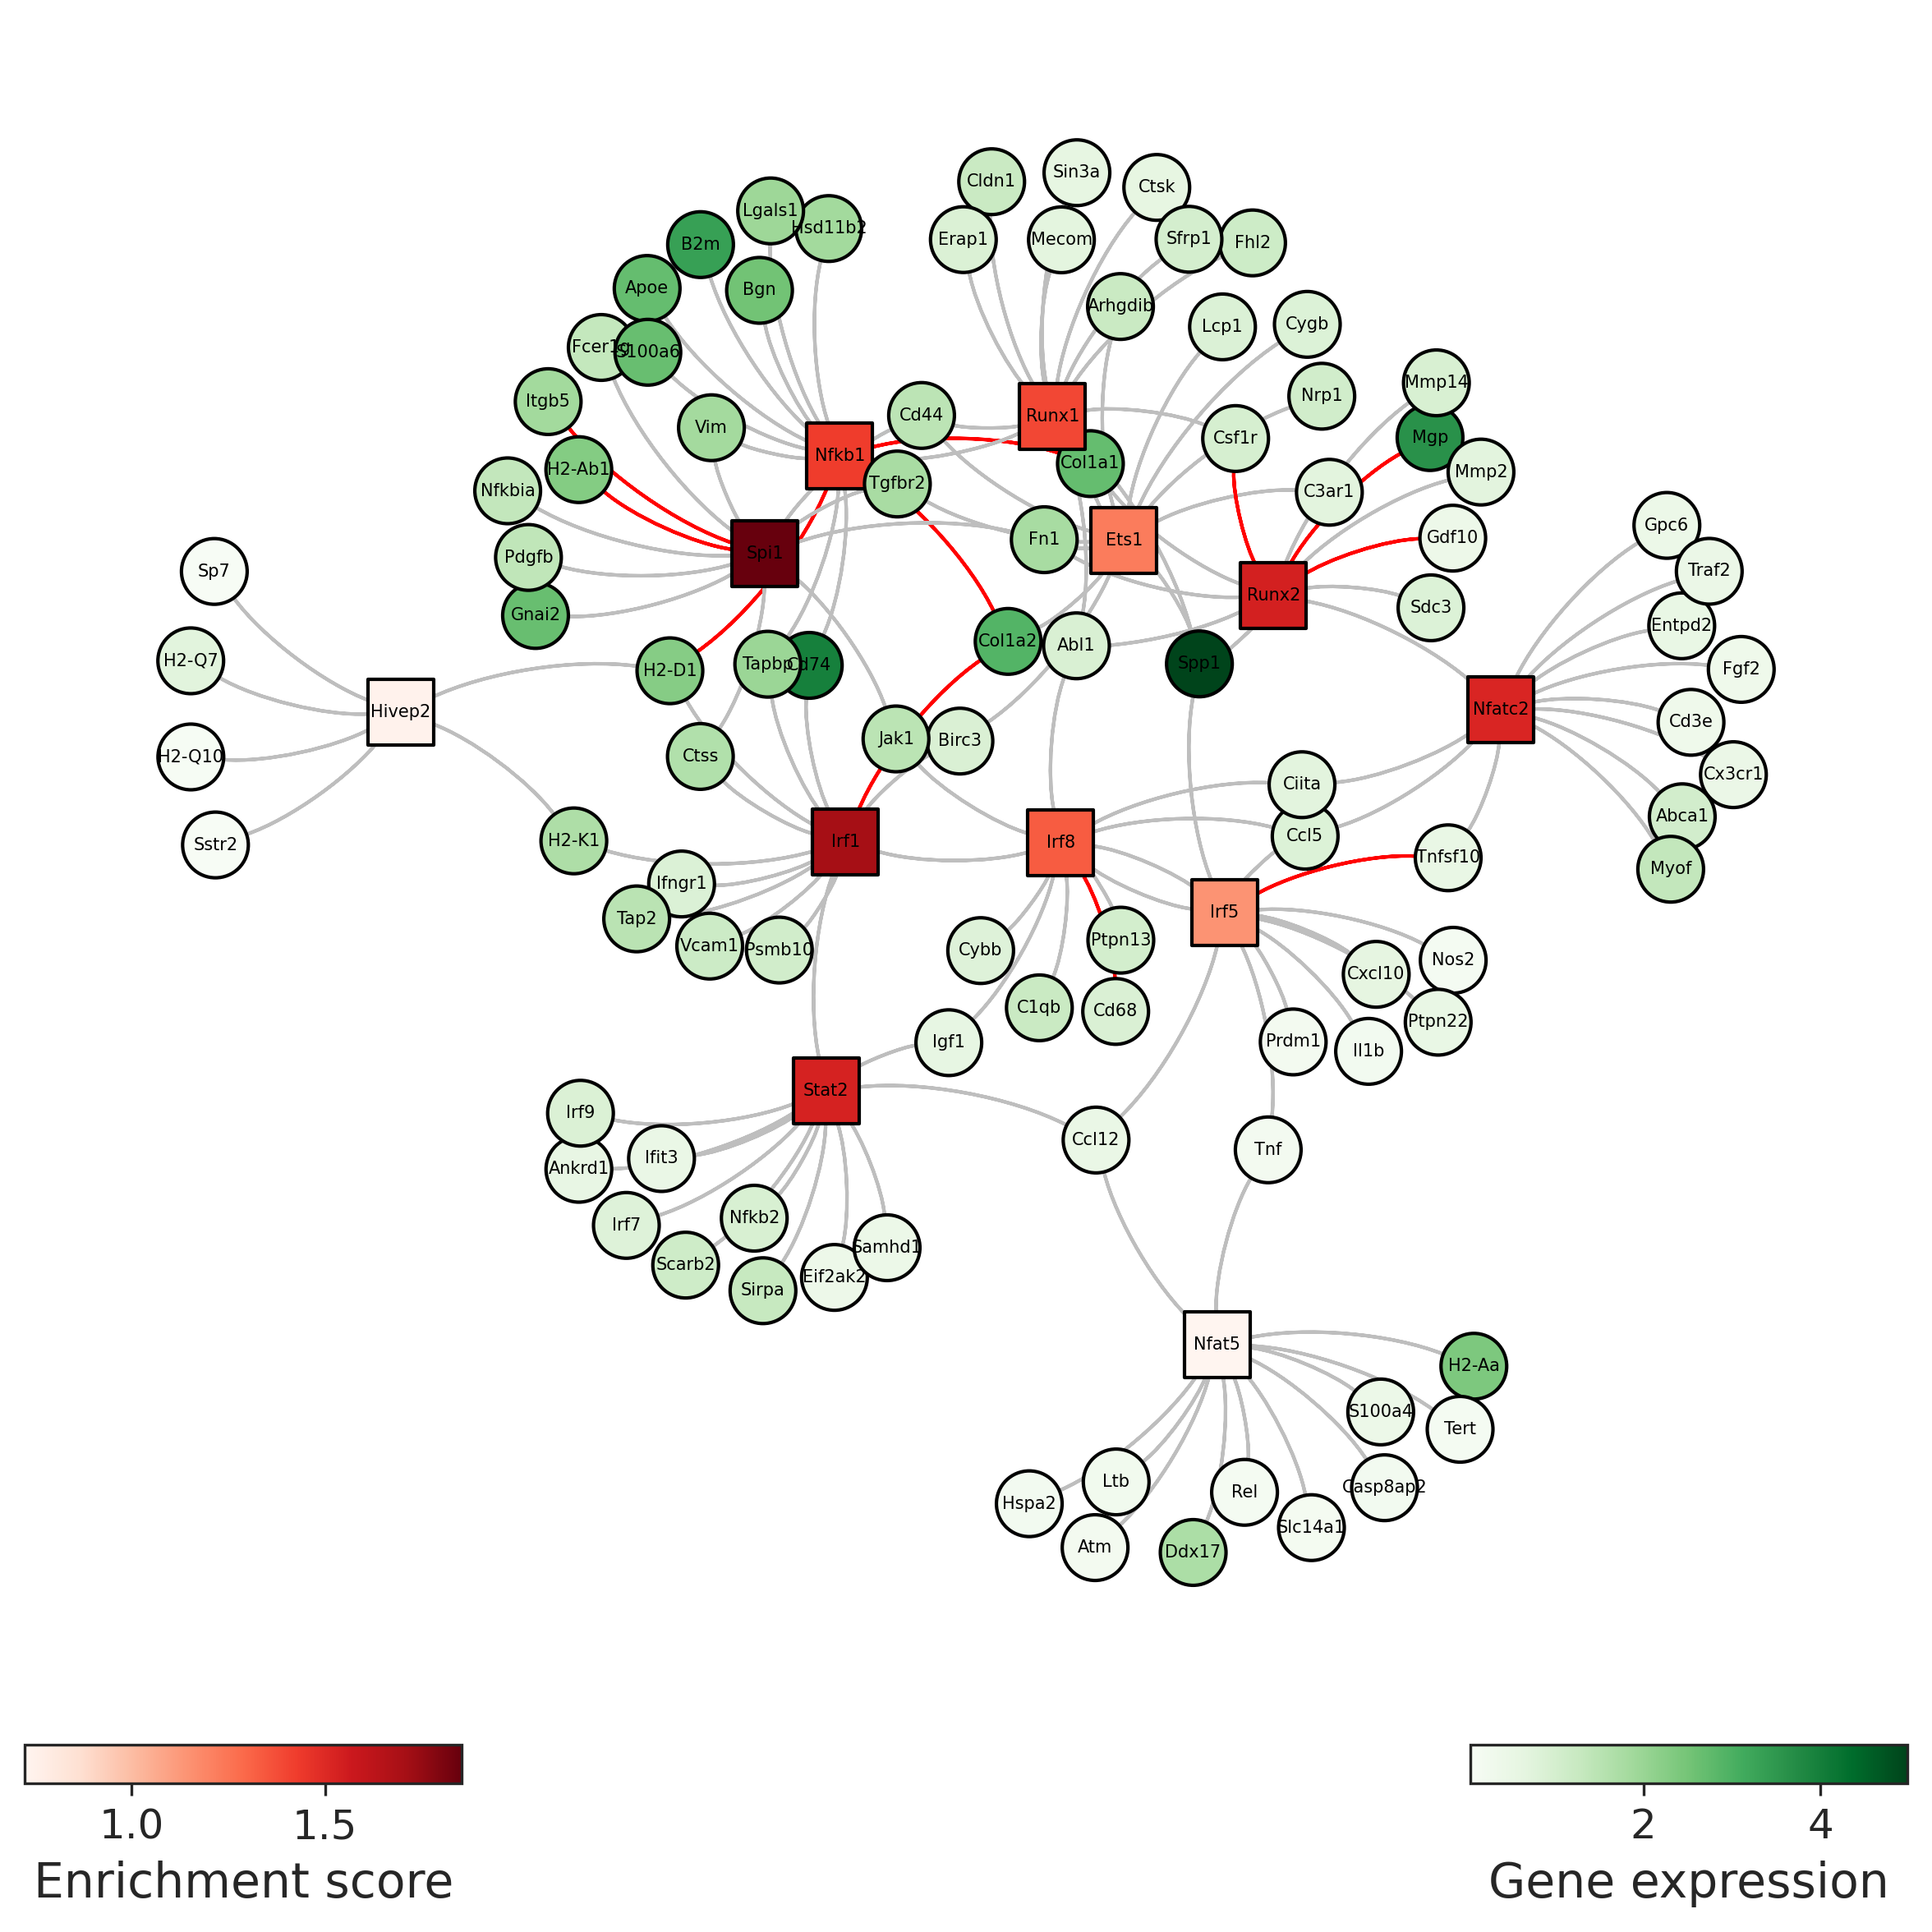

/home/qiao/anaconda3/envs/scvi-env/lib/python3.10/site-packages/igraph/io/files.py:494: RuntimeWarning: The non-numeric, non-string, non-boolean vertex attribute 'color' was ignored. at src/io/gml.c:1213
  return writer(f, *args, **kwds)


In [423]:
plot_network(
    net=subset_net,
    obs = aggregated,
    act = fc,
    n_sources=['Hivep2','Nfat5','Nfatc2','Spi1','Nfkb1', 'Irf1','Irf5','Irf8',
                  'Runx1','Runx2','Ets1','Stat2'],
    n_targets=12,
    node_size=80,
    c_pos_w='grey',
    c_neg_w='red',
    s_cmap='Reds',
    t_cmap='Greens',
    figsize=(8,8),
    dpi=300,
    save = 'GRN.pdf'
)

In [369]:
net=subset_net
obs = aggregated
act = fc
n_sources=['Hivep2','Nfat5','Nfatc2','Spi1','Nfkb1', 'Irf1','Irf5','Irf8',
              'Runx1','Runx2','Ets1','Stat2']
fact, fobs, fnet = get_obs_act_net(act, obs, net, n_sources, n_targets, by_abs)

# Get colors
s_norm = get_norm(fact, vcenter=False)
t_norm = get_norm(fobs, vcenter=False)

In [370]:
fact

names,Irf1,Nfkb1,Irf8,Spi1,Stat2,Nfatc2,Runx2,Irf5,Ets1,Runx1,Nfat5,Hivep2
CN7,1.708173,1.4259,1.329484,1.854313,1.528475,1.51448,1.5385,1.146838,1.225336,1.392056,0.723503,0.741631


In [371]:
g = get_g(fact, fobs, fnet)
g.es['color'] = ['grey' if w > 0 else 'grey' for w in g.es['weight']]

In [372]:
s_cmap='Reds'
t_cmap='Greens'
is_cmap = add_colors(g, fact, fobs, s_norm, t_norm, s_cmap, t_cmap)

In [373]:
is_cmap

True

In [375]:
del g.vs['label']

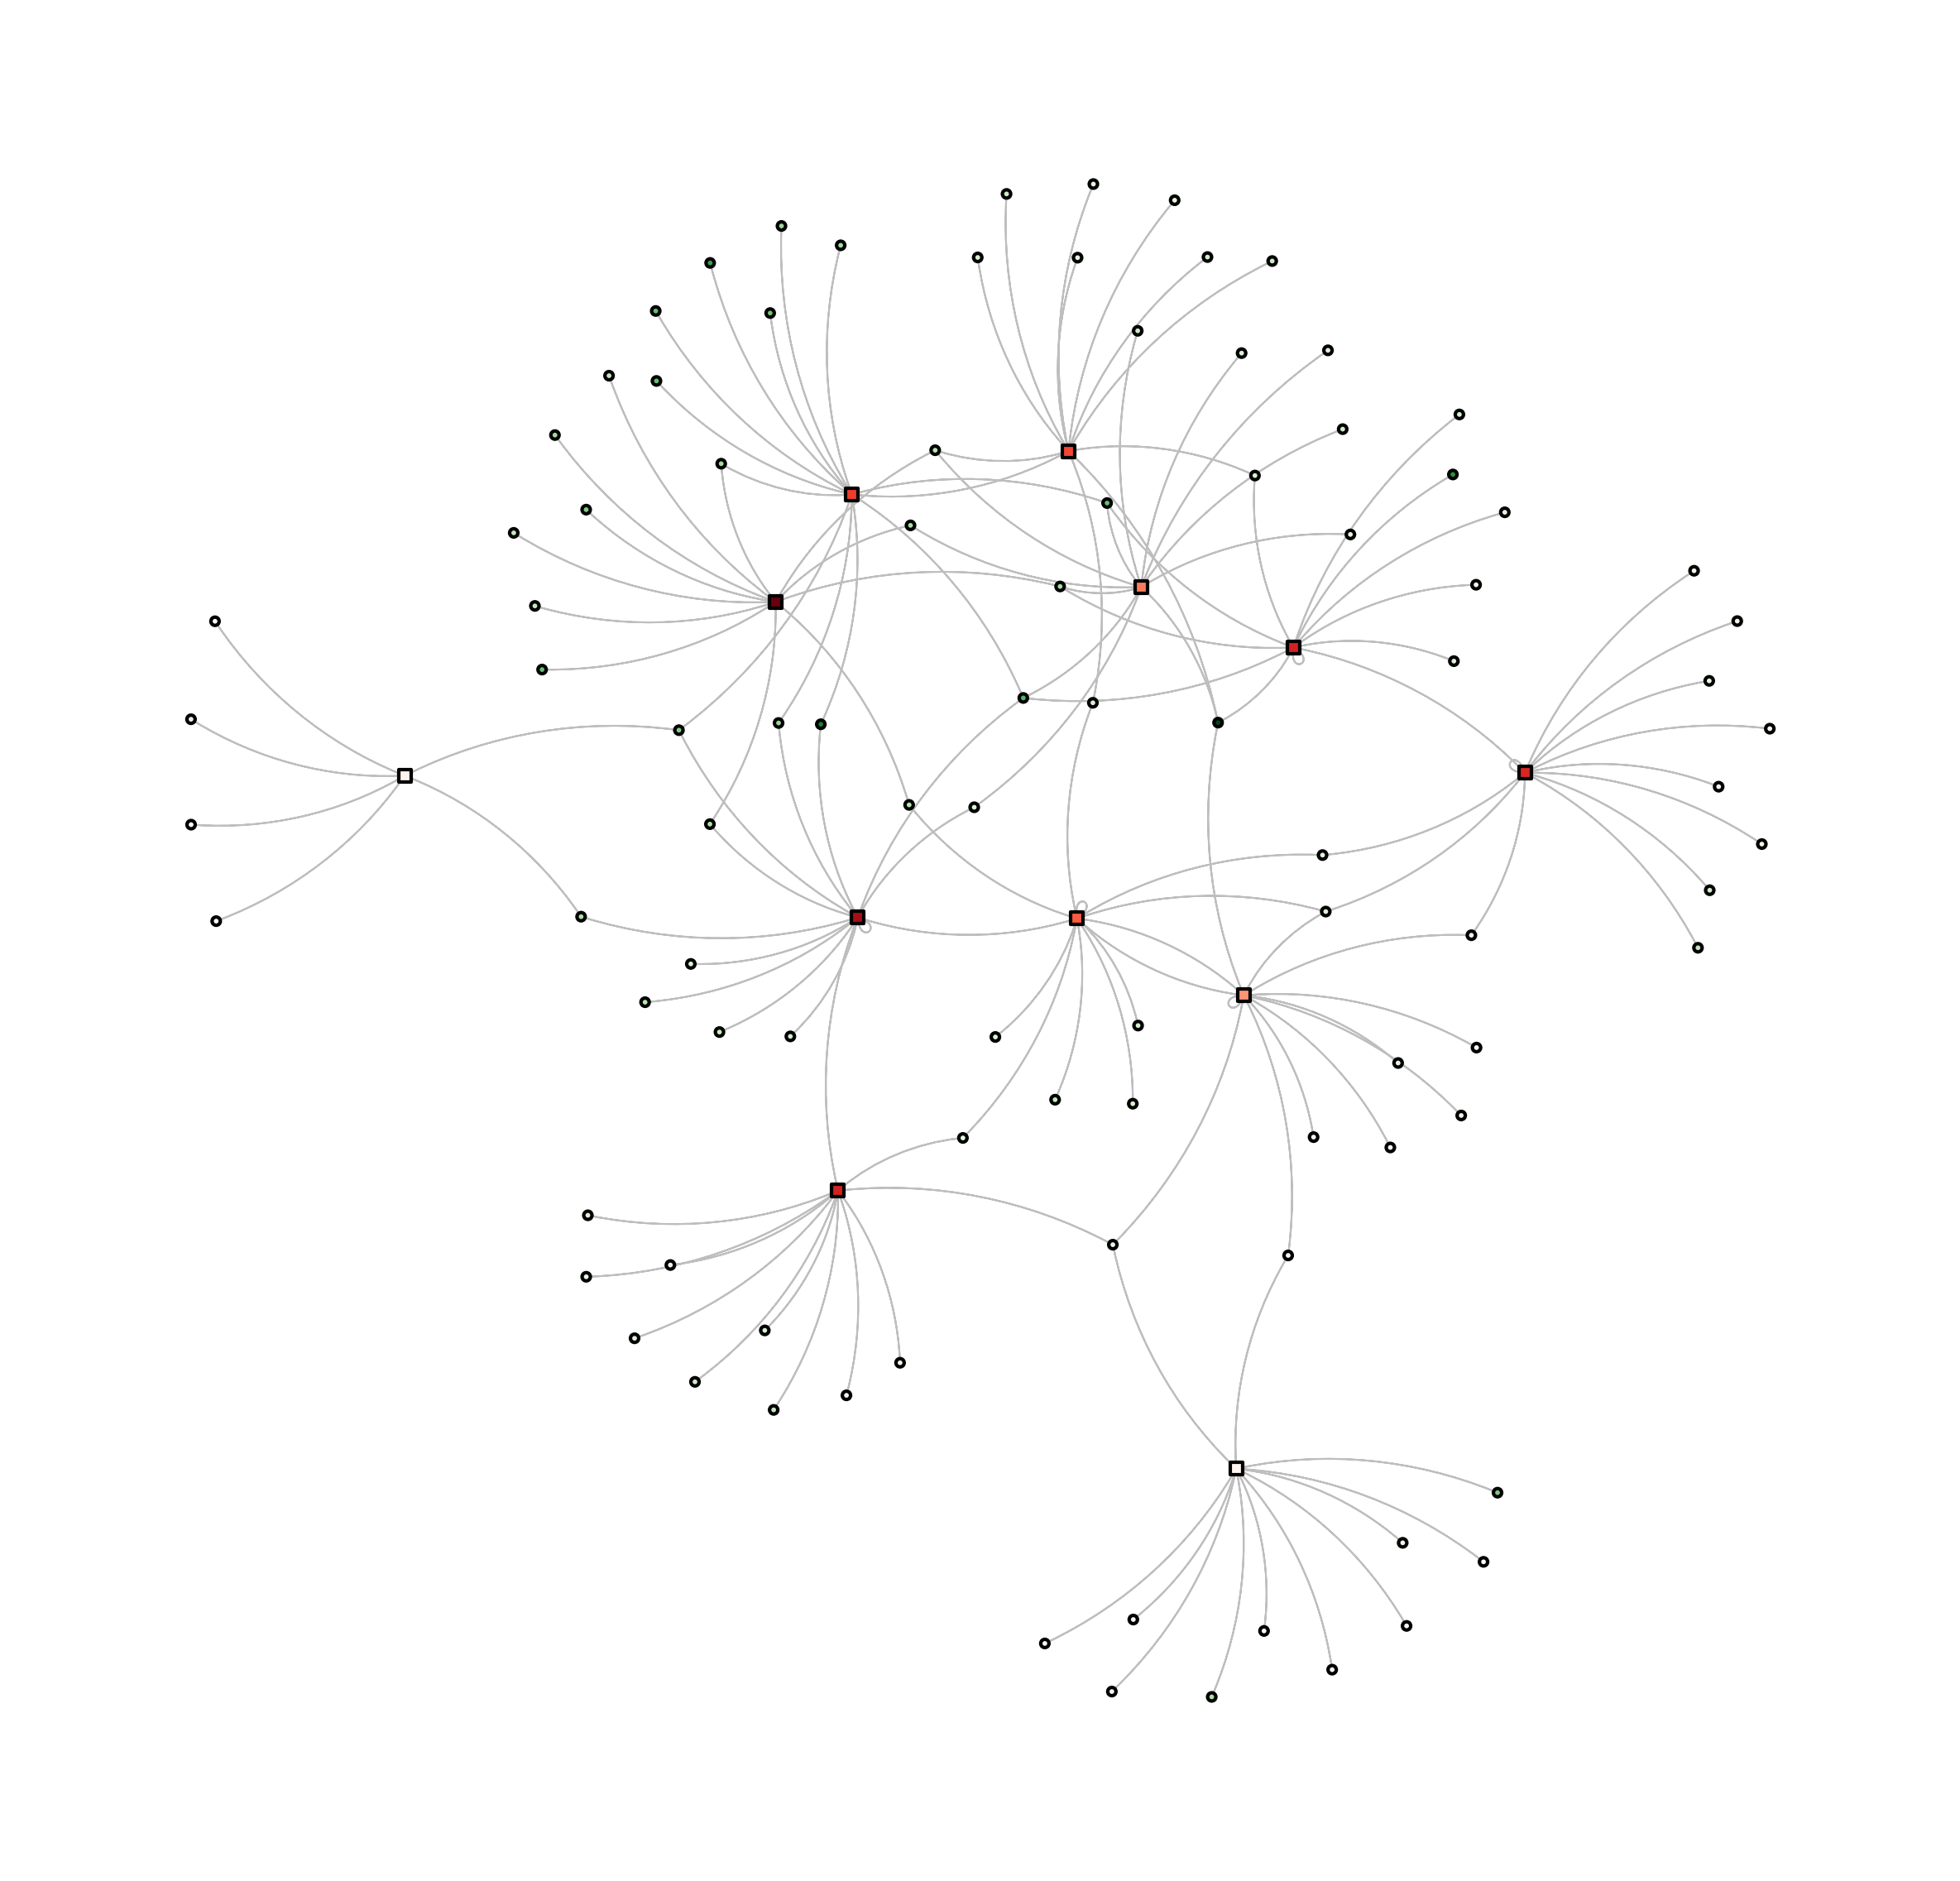

In [384]:
fig = plt.figure(figsize=(8,8),dpi=300,tight_layout=True)
gs = mpl.gridspec.GridSpec(5, 4, height_ratios=[1, 1, 1, 1, 0.10])
ax1 = fig.add_subplot(gs[:-1, :])
ig.plot(
    g,
    target=ax1,
    layout='kk',
    vertex_size=[15 if t == 0 else 10 for t in g.vs['type']],
    vertex_label_size=0,
    vertex_label_dist=0,  # Move label below the dot
    vertex_label_position='below',  # Position labels below
    edge_width=0.5,         # Reduce line thickness
    edge_curved=0.2,        # Make edges curved
    edge_arrow_size=0,      # Remove arrowheads
    edge_arrow_width=0
)
fig.savefig('network_new.pdf', format='pdf', bbox_inches='tight')
fig.show()

In [311]:
import matplotlib as mpl
import igraph as ig

def plot_network(
    net,
    obs=None,
    act=None,
    n_sources=5,
    n_targets=10,
    by_abs=True,
    node_size=0.5,
    label_size=5,
    s_cmap='RdBu_r',
    t_cmap='viridis',
    vcenter=False,
    c_pos_w='darkred',
    c_neg_w='darkblue',
    s_label='Enrichment score',
    t_label='Gene expression',
    layout='kk',
    figsize=(10, 10),
    dpi=150,
    return_fig=False,
    save=None
):


    if act is None and obs is None:
        sources = net['source'].unique().astype('U')
        act = pd.DataFrame(np.ones((1, sources.size)), index=['0'], columns=sources)
        targets = net['target'].unique().astype('U')
        obs = pd.DataFrame(np.ones((1, targets.size)), index=['0'], columns=targets)

    # Extract filtered obs, act, and net
    fact, fobs, fnet = get_obs_act_net(act, obs, net, n_sources, n_targets, by_abs)

    # Get colors
    s_norm = get_norm(fact, vcenter=vcenter)
    t_norm = get_norm(fobs, vcenter=vcenter)

    # Build igraph object and assign edge colors
    g = get_g(fact, fobs, fnet)
    g.es['color'] = [c_pos_w if w > 0 else c_neg_w for w in g.es['weight']]

    # Add vertex colors using your helper function (optional)
    is_cmap = add_colors(g, fact, fobs, s_norm, t_norm, s_cmap, t_cmap)

    # Build figure
    fig = plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
    gs = mpl.gridspec.GridSpec(5, 4, height_ratios=[1, 1, 1, 1, 0.10])
    ax1 = fig.add_subplot(gs[:-1, :])
    ax2 = fig.add_subplot(gs[-1, 0])
    ax3 = fig.add_subplot(gs[-1, -1])

    # Plot the network
    ig.plot(
        g,
        target=ax1,
        layout=layout,
        vertex_size=node_size,
        vertex_label_size=label_size,
        vertex_label_dist=0,  # Move label below the dot
        vertex_label_position='below',  # Position labels below
        edge_width=1,         # Reduce line thickness
        edge_curved=0.2,        # Make edges curved
        edge_arrow_size=0,      # Remove arrowheads
        edge_arrow_width=0
    )

    # Colorbars
    if is_cmap:
        fig.colorbar(
            mpl.cm.ScalarMappable(norm=s_norm, cmap=s_cmap),
            cax=ax2,
            orientation="horizontal",
            label=s_label
        )
        fig.colorbar(
            mpl.cm.ScalarMappable(norm=t_norm, cmap=t_cmap),
            cax=ax3,
            orientation="horizontal",
            label=t_label
        )
    else:
        ax2.axis("off")
        ax3.axis("off")
    plt.show()
    
    if save:
        fig.savefig(save, format='pdf', bbox_inches='tight')
    if return_fig:
        return fig
        
    g.save("network.gml")

def get_obs_act_net(act, obs, net, n_sources, n_targets, by_abs):

    # Force act and obs to match
    assert np.all(obs.index == act.index) and (obs.index.size == 1), 'obs and act need to have the same row index.'

    # Select top sources
    s_idx = get_source_idxs(n_sources, act, by_abs)

    # Filter by top sources
    act = act.iloc[:, s_idx]
    net = net.loc[np.isin(net['source'].astype(str), act.columns.astype(str))].copy()

    # Add w if needed
    if 'weight' not in net.columns:
        net['weight'] = 1

    # Select top targets
    t_idx = get_target_idxs(n_targets, obs, net, by_abs)

    # Filter by top targets
    net = net.loc[t_idx]

    # Filter empty targets
    obs = obs.loc[:, np.isin(obs.columns.astype(str), net['target'].astype(str))]
    net = net.loc[np.isin(net['target'].astype(str), obs.columns.astype(str)), :]

    return act, obs, net

def get_source_idxs(n_sources, act, by_abs):
    if isinstance(n_sources, str):
        s_idx = np.isin(act.columns, [n_sources])
    elif isinstance(n_sources, list):
        s_idx = np.isin(act.columns, n_sources)
    elif isinstance(n_sources, int):
        if by_abs:
            s_idx = np.argsort(-abs(act.values[0]))[:n_sources]
        else:
            s_idx = np.argsort(-act.values[0])[:n_sources]
    else:
        raise ValueError('n_sources needs to be a list of source names or an \
        integer number, {0} was passed.'.format(type(n_sources)))
    return s_idx


def get_target_idxs(n_targets, obs, net, by_abs):
    if isinstance(n_targets, str):
        t_idx = np.isin(net['target'].astype(str), [n_targets])
    elif isinstance(n_targets, list):
        t_idx = np.isin(net['target'].astype(str), n_targets)
    elif isinstance(n_targets, int):
        net['prod'] = [obs.iloc[0][t] * w if t in obs.columns else 0 for t, w in zip(net['target'], net['weight'])]
        if by_abs:
            net['prod'] = abs(net['prod'])
        t_idx = (
            net
            .sort_values(['source', 'prod'], ascending=[True, False])
            .groupby(['source'], observed=True)
            .head(n_targets)
            .index
            .values
        )
    else:
        raise ValueError('n_targets needs to be a list of target names or an \
        integer number, {0} was passed.'.format(type(n_targets)))
    return t_idx

def get_norm(df, vcenter):
    x = df.values.ravel()
    if vcenter:
        vmax = np.max(np.abs(x))
        norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax)
    else:
        vmax = np.max(x)
        vmin = np.min(x)
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    return norm

def get_g(act, obs, net):


    # Unify network
    v_dict, types = get_dict_types(act, obs)

    # Transform net to edges
    edges = net_to_edgelist(v_dict, net)

    # Create graph
    g = ig.Graph(
        edges=edges,
        directed=True,
    )

    # Update attributes
    g.es['weight'] = net['weight'].values
    g.vs['type'] = types
    g.vs['label'] = list(v_dict.keys())
    g.vs['shape'] = np.where(types, 'circle', 'square')

    return g

def get_dict_types(act, obs):
    vs = np.unique(np.hstack([act.columns, obs.columns]))
    v_dict = {k: i for i, k in enumerate(vs)}
    types = (~np.isin(vs, act.columns)) * 1
    return v_dict, types


def net_to_edgelist(v_dict, net):
    edges = []
    for i in net.index:
        source, target = net.loc[i, 'source'], net.loc[i, 'target']
        edge = [v_dict[source], v_dict[target]]
        edges.append(edge)
    return edges

def add_colors(g, act, obs, s_norm, t_norm, s_cmap, t_cmap):

    cmaps = mpl.colormaps.keys()
    if (s_cmap in cmaps) and (t_cmap in cmaps):
        s_cmap = mpl.colormaps.get_cmap(s_cmap)
        t_cmap = mpl.colormaps.get_cmap(t_cmap)
        color = []
        for i, k in enumerate(g.vs['label']):
            if g.vs['type'][i]:
                color.append(t_cmap(t_norm(obs[k].values[0])))
            else:
                color.append(s_cmap(s_norm(act[k].values[0])))
        is_cmap = True
    else:
        color = [s_cmap if typ == 0. else t_cmap for typ in g.vs['type']]
        is_cmap = False
    g.vs['color'] = color
    return is_cmap